In [27]:
from train_explainer import get_ising_explainer, get_model, get_dataset, load_config
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import networkx as nx
import torch
device = "cpu"
config_path = "config/config_mutag_explainer.yaml"
config = load_config(config_path)
train_loader, test_loader = get_dataset(config)
model =get_model(config).to(device)
explainer,_,_ = get_ising_explainer(config)
explainer.red = 1
explainer = explainer.to(device)

In [28]:
# We select one of the molecules in the dataset.
data, exp = test_loader[15]
node_imp = exp[0].node_imp
batch = torch.zeros(data.x.size(0), dtype = torch.int64).to(device)

#Lets get the magnetic field and sample an explainibility mask.
mask, h = explainer(data.x, data.edge_index, data.edge_attr,batch, model,data.color, y = data.y,train = False, n_iter = 10)


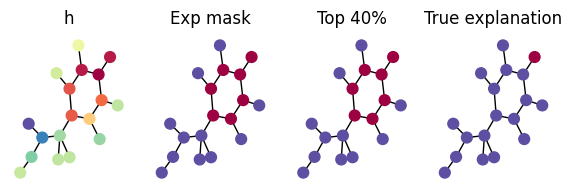

In [39]:
#Now we plot the results.

g = to_networkx(data, to_undirected=True)
pos = nx.kamada_kawai_layout(g)
fig, ax = plt.subplots(1, 4, figsize = (7,2))
ax = ax.flatten()
k = int(data.x.size(0)*0.25)
val, ind = torch.topk(h.flatten().detach().cpu(), int(data.x.size(0)*0.40)) # Select 25% of the nodes
pred = torch.zeros(data.x.size(0))
pred[ind] = 1.
pc = nx.draw(g, node_color = h.detach().cpu().numpy() , node_size=60,pos = pos,cmap=plt.cm.Spectral_r,ax = ax[0])
pc = nx.draw(g, node_color = mask , node_size=60,pos = pos,cmap=plt.cm.Spectral_r,ax = ax[1])
pc = nx.draw(g, node_color = pred , node_size=60,pos = pos,cmap=plt.cm.Spectral_r,ax = ax[2])
pc = nx.draw(g, node_color = node_imp , node_size=60,pos = pos,cmap=plt.cm.Spectral_r,ax = ax[3])
ax[0].set_title("h");
ax[1].set_title("Exp mask")
ax[2].set_title("Top 40%")
ax[3].set_title("True explanation");

